# Modify Assignment 3 Notebook
**Objective:** Using checkpoint save the training model weights. 

To achieve this, ensure that in Assignment 3 notebook, you have created a folder in the content folder called *training_1*.

Also you have the following script written before the model.fit cell.


```
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
```
Furthermore, in the model.fit function call, add the fourth parameter 

```
callbacks=[cp_callback]
```
so that the complete function call is like,



```
history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches,
                         callbacks=[cp_callback])
```

Execute the Assignment 3 Notebook after making the above modifications. And, then download all files from training_1 folder of Assignment 3.

# Assignment 2 Guide

In [ ]:
import os
import sys
import cv2
import numpy as np
import tensorflow as tf

from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


Create training_1 folder in Google Drive and populate it with downloaded files using Google Drive interface. 

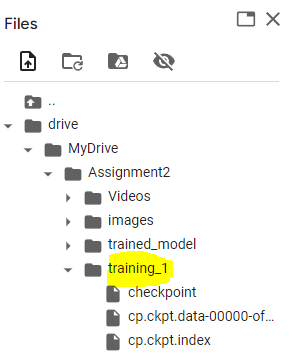

Using Assignment 3, redefine the function below. The function would stay in Assignment 2 notebook.


1.   What is ***global_average_layer*** defined as, copy-paste to overwrite if needed.
2.   What is ***prediction_layer***, copy-paste to overwrite if needed.
3.   What is ***base_learning_rate***, copy-paste to overwrite if needed.
4.   How is ***model.compile*** function called, copy-paste its parameters and overwrite if needed.

In [ ]:
# Define a simple sequential model
def create_model():
    IMG_SHAPE = (160, 160, 3)
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
                                               
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    #feature_batch_average = global_average_layer(feature_batch)
                                               
    prediction_layer = tf.keras.layers.Dense(1)                                            
    model = tf.keras.Sequential([base_model,global_average_layer,
    prediction_layer])

    base_learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model


In [ ]:
# Create a basic model instance
model = create_model()

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
checkpoint_path = "/content/drive/MyDrive/Assignment2/training_1/cp.ckpt"
# Loads the weights
model.load_weights(checkpoint_path)

In [ ]:
import keras.utils as image
import matplotlib.pyplot as plt

def read_images(path, sz=None):
    """Reads the images in a given folder, resizes images on the fly if size is given.

    Args:
        path: Path to a folder with subfolders representing the subjects (persons).
        sz: A tuple with the size Resizes

    Returns:
        A list [X,y]

            X: The images, which is a Python list of numpy arrays.
            y: The corresponding labels (the unique number of the subject, person) in a Python list.
    """
    c = 0
    strerror = ''
    errno = 0
    X,y = [], []
    new_size = (sz, sz)
    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if (filename == ".directory"):
                        continue
                    filepath = os.path.join(subject_path, filename)
                    print (filepath)
                    im = image.load_img(os.path.join(subject_path, filename))
                    #multiple ways to do pre processing. If you have already achieved this, then ignore.
                    #One way could be to create 
                    #an if else if statement here which is controlled by an additional 
                    #parameter of this function.
                    #if choice == 0: no pre processing
                    #elif choice == 1: pre processing with colour enhancement
                    #elif choice == 2: pre processing with colour sharpness
                    #refer to this URL for pre processing approaches: https://www.geeksforgeeks.org/image-enhancement-in-pil/


                    #When you are compiling results, you would call this function 3 times 
                    print(im)
                    plt.imshow(im)
                    if (im is None):
                        print ("image " + filepath + " is none") 
                    # resize to given size (if given)
                    if (sz is not None):   
                        #ref: https://www.geeksforgeeks.org/image-recognition-with-mobilenet/

                        res_img = im.resize(new_size)
                        # Convert the PIL image to Tensor
                        resizedimg = image.img_to_array(res_img)
                        finalimg = np.expand_dims(resizedimg,axis=0)
                        finalimg = tf.keras.applications.mobilenet_v2.preprocess_input(finalimg)
                        finalimg.shape                       

                    #X.append(np.asarray(im, dtype=np.uint8))
                    X.append(finalimg)
                    y.append(c)
                # except IOError, (errno, strerror):
                #     print ("I/O error({0}): {1}".format(errno, strerror))
                except:
                    print ("Unexpected error:", sys.exc_info()[0])
                    raise
            c = c+1
    return [X,y]


In [ ]:
[X,y] = read_images('/content/drive/MyDrive/Assignment2/images/', 160)

In [ ]:
y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
#cv2_imshow(X)

In [ ]:
#from tensorflow.keras.models import load_model
# import tensorflow as tf
# model = tf.keras.models.load_model('/content/drive/MyDrive/Assignment2/trained_model/my_model.h5')

In [ ]:
print("Total Params:", model.count_params())
model.summary()

Total Params: 2259265
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
#predicted_labels = model.predict(X[0])
model.predict(X[0])
#print("no helmet" if model.predict(X[0]) > 0 else "helmet")

1/1 [==============================] - 1s 784ms/step


array([[-0.05311431]], dtype=float32)